In [1]:
import os
import sys
import seaborn as sns 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [2]:
model_path = '/users/Stathis/GoogleDrive/Garbage/'
nets =  list(filter(lambda x: os.path.isdir(os.path.join(model_path, x)), os.listdir(model_path)))
nets = [a for a in nets if 'transfer' in a]
nets.sort()
nets

['transfer_densenet121_10_layers',
 'transfer_densenet121_12_layers',
 'transfer_densenet121_14_layers',
 'transfer_densenet121_all_layers',
 'transfer_densenet121_last_layer',
 'transfer_resnet56_10_layers',
 'transfer_resnet56_12_layers',
 'transfer_resnet56_14_layers',
 'transfer_resnet56_all_layers',
 'transfer_resnet56_all_layers_1',
 'transfer_resnet56_last_layer']

In [3]:
summaries = {}
test_results ={}
for net in nets:
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/summary.csv', delimiter=",")
    summaries[net] = data_train
    stats_path =  os.path.join(model_path, net) +'/result_outputs'
    data_train = pd.read_csv(stats_path+'/test_summary.csv', delimiter=",")
    test_results[net] = data_train

In [4]:
order = ['last_layer', '10_layers', '12_layers', '14_layers', 'all_layers']

In [5]:
resnet = []
densenet = []
for o in order:
    resnet.append(test_results['transfer_resnet56_'+o]['test_acc'][0])
    densenet.append(test_results['transfer_densenet121_'+o]['test_acc'][0])

In [6]:
resnet

[0.7168710443037974,
 0.8894000000000001,
 0.8939000000000001,
 0.904,
 0.9165348101265824]

In [7]:
densenet

[0.8238726265822784, 0.9258, 0.9292999999999998, 0.926, 0.9508504746835444]

In [8]:
order=['Last layer', '10 layers', '12 layers', '14 layers', 'All layers']

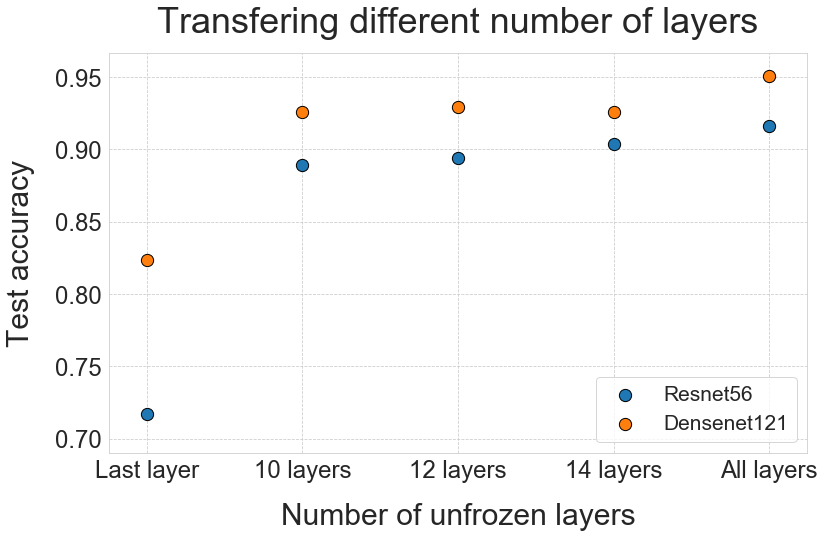

In [54]:
scale=1.5
s=100*scale
plt.rcParams.update({'font.size': 16*scale})
fig=plt.figure(figsize=(12,8))
plt.scatter(x=order, y=resnet, edgecolors='k', s=s, label='Resnet56')
plt.scatter(x=order, y=densenet, edgecolors='k',s=s, label='Densenet121')
ax = plt.gca()
ax.xaxis.grid(True,linestyle='--')
ax.yaxis.grid(True,linestyle='--')
plt.xlabel('Number of unfrozen layers',fontdict={'size':20*scale}, labelpad=20)
plt.ylabel('Test accuracy',fontdict={'size':20*scale}, labelpad=20)
plt.title('Transfering different number of layers',fontdict={'size':24*scale}, pad=20)
plt.legend(loc=4, fontsize=14*scale)
plt.tight_layout()
fig.savefig('images/tl_layers.pdf')

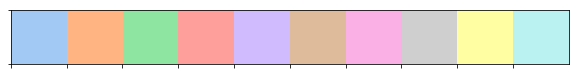

In [22]:
import seaborn as sns 
current_palette = sns.color_palette('pastel')
sns.palplot(current_palette)
# sns.set()

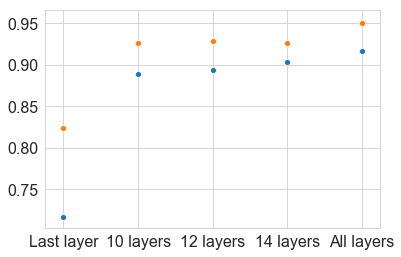

In [23]:
sns.set_style("whitegrid")
# sns.set_style("ticks")
palette='pastel'
sns.scatterplot(x=order, y=resnet, palette=palette)
sns.scatterplot(x=order, y=densenet, palette=palette)

In [24]:
list(zip(order, resnet))

[('Last layer', 0.7168710443037974),
 ('10 layers', 0.8894000000000001),
 ('12 layers', 0.8939000000000001),
 ('14 layers', 0.904),
 ('All layers', 0.9165348101265824)]

In [25]:
tips = sns.load_dataset("tips")

In [26]:
x = list(zip(order, resnet))
df = pd.DataFrame.from_records(x,columns=['Number of layers','Accuracy'])
df = df.set_index('Number of layers')

x = list(zip(order, densenet))
df2 = pd.DataFrame.from_records(x,columns=['Number of layers','Accuracy'])
df2 = df2.set_index('Number of layers')

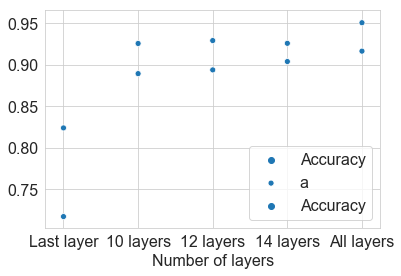

In [27]:
sns.scatterplot(data=df)
sns.scatterplot(data=df2,label='a')